In [193]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [194]:
df= pd.read_csv('E:\\data science\\data.csv')

In [195]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [196]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x=df['Height'] #independent
y=df['Weight'] #dependent 


In [200]:
x=x.values.reshape(-1,1)

In [201]:
x.shape

(15, 1)

In [202]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [203]:
x_train

array([[1.8 ],
       [1.6 ],
       [1.68],
       [1.52],
       [1.5 ],
       [1.83],
       [1.57],
       [1.65],
       [1.73],
       [1.78],
       [1.55],
       [1.63]])

In [204]:
x_train.shape

(12, 1)

In [205]:
training_data= pd.DataFrame({'x_train': x_train.flatten(), 'y_train':y_train})

In [206]:
training_data

,x_train,y_train
13,1.80,72.19
5,1.60,58.57
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12
14,1.83,74.46
4,1.57,57.20
7,1.65,61.29
10,1.73,66.28
12,1.78,69.92


In [207]:
test_data=pd.DataFrame({'x_test': x_test.flatten(),'y_test': y_test})

In [208]:
from sklearn.linear_model import LinearRegression


In [209]:
reg=LinearRegression()

In [210]:
reg.fit(x_train,y_train)

LinearRegression()

In [211]:
reg.coef_

array([63.13171913])

In [212]:
reg.intercept_

-42.178608958837785

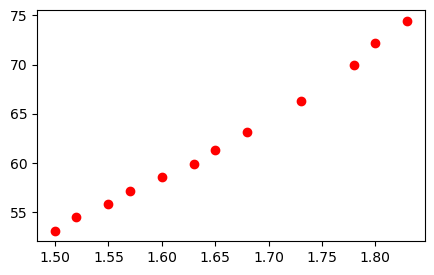

In [213]:
plt.figure(figsize=(5,3))
plt.scatter(x=x_train,y=y_train,color='r')
plt.xlabel=("x_train")
plt.ylabel=("y_train")
plt.show()

In [214]:
training_data.head()

,x_train,y_train
13,1.80,72.19
5,1.60,58.57
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12


In [215]:
63.13171913*1.80-42.178608958837785

71.45848547516222

In [216]:
y_train_prediction=reg.predict(x_train)
y_train_prediction

array([71.45848547, 58.83214165, 63.88267918, 53.78160412, 52.51896973,
       73.35243705, 56.93819007, 61.9887276 , 67.03926513, 70.19585109,
       55.67555569, 60.72609322])

In [217]:
training_data['y_train_prediction']=y_train_prediction

In [218]:
training_data

,x_train,y_train,y_train_prediction
13,1.80,72.19,71.458485
5,1.60,58.57,58.832142
8,1.68,63.11,63.882679
2,1.52,54.48,53.781604
1,1.50,53.12,52.518970
14,1.83,74.46,73.352437
4,1.57,57.20,56.938190
7,1.65,61.29,61.988728
10,1.73,66.28,67.039265
12,1.78,69.92,70.195851


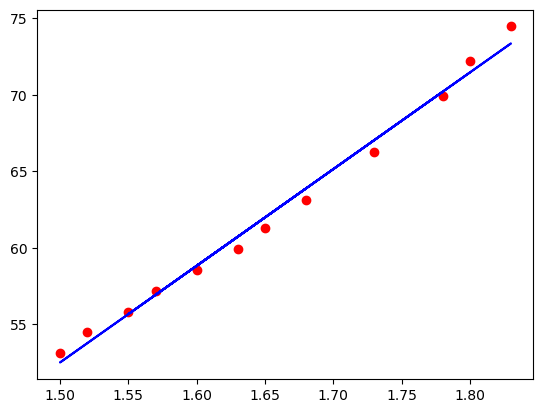

In [219]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,y_train_prediction,color='b')
plt.show()

In [220]:
from sklearn.metrics import r2_score

In [221]:
print(f'the model accuracy is {r2_score(y_train,y_train_prediction)}')

the model accuracy is 0.9907071189933878


In [222]:
print(f'the model loss is {1-r2_score(y_train,y_train_prediction)}')

the model loss is 0.009292881006612186


# test prediction

In [223]:
y_test_prediction=reg.predict(x_test)
y_test_prediction

array([65.14531356, 68.30189952, 50.62501816])

In [224]:
test_data['y_test_prediction']=y_test_prediction

In [225]:
test_data

,x_test,y_test,y_test_prediction
9,1.70,64.47,65.145314
11,1.75,68.10,68.301900
0,1.47,52.21,50.625018


In [226]:
print(f' test accuracy {r2_score(y_test,y_test_prediction)}')

 test accuracy 0.9782994097388882


In [227]:
print(f' test loss {1-r2_score(y_test,y_test_prediction)}')

 test loss 0.02170059026111182


In [228]:
reg.predict([[2.32]])

array([104.28697942])

In [229]:
63.13171913*2.32-42.178608958837785

104.2869794227622